## Project Overview

***Project Objective***

The objective of this project is to analyze the home loan datasets (train and test) to understand factors influencing loan approval decisions. The train dataset likely contains a target variable (e.g., Loan_Status), which can be used to build a predictive model, while the test dataset is used for predictions or validation. The analysis will involve data collection, cleaning, exploratory data analysis (EDA), and potentially building a model to predict loan approval outcomes.

***Project Phases***

Phase 1: Data Collection and Preparation

Objective: Load, inspect, and clean the train and test datasets to ensure they are ready for analysis.

Tasks:

- Load the datasets from the provided URLs.

- Handle missing values, data types, and inconsistencies.

- Encode categorical variables (e.g., Gender, Married, Education) if needed.

- Ensure consistency between train and test datasets (e.g., same columns except the target).




Phase 2: Exploratory Data Analysis (EDA)

Objective: Understand the distribution, relationships, and patterns in the data to identify key features influencing loan approval.

Tasks:

- Summarize numerical and categorical variables (e.g., mean, median, counts).
- Visualize distributions (e.g., histograms for ApplicantIncome, LoanAmount).
- Analyze relationships between features and the target variable (Loan_Status in train data).
- Compare train and test datasets to ensure similar distributions.

In [40]:
# Importing Libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Set display options for pandas tables
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


In [41]:
url1 = "https://raw.githubusercontent.com/kenstare/Practice_datasets/master/home_loan_train.csv"
url2 = "https://raw.githubusercontent.com/kenstare/Practice_datasets/master/home_loan_test.csv"

df1 = pd.read_csv(url1)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df2 = pd.read_csv(url2)
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
# Basic info for train dataset
print("\nTrain Dataset Info:")
print(df1.info())
print("\nTrain Dataset Missing Values:")
print(df1.isnull().sum())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Train Dataset Missing Values:
Loan_ID               0
Gender               13
Married

In [44]:
# Handle missing values (basic approach: fill numerical with median, categorical with mode)
# Train dataset
for col in df1.columns:
    if df1[col].dtype in ['int64', 'float64']:
        df1[col].fillna(df1[col].median(), inplace=True)
    else:
        df1[col].fillna(df1[col].mode()[0], inplace=True)

C:\Users\akind\AppData\Local\Temp\ipykernel_50776\148804253.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)
C:\Users\akind\AppData\Local\Temp\ipykernel_50776\148804253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [45]:
print("Missing Values After Imputation:")
print("Train:", df1.isnull().sum().sum())

Missing Values After Imputation:
Train: 0


In [46]:
# Basic info for test dataset
print("\nTest Dataset Info:")
print(df2.info())
print("\nTest Dataset Missing Values:")
print(df2.isnull().sum())


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None

Test Dataset Missing Values:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education

In [47]:
# Handle missing values (basic approach: fill numerical with median, categorical with mode)
# Test dataset
for col in df2.columns:
    if df2[col].dtype in ['int64', 'float64']:
        df2[col].fillna(df2[col].median(), inplace=True)
    else:
        df2[col].fillna(df2[col].mode()[0], inplace=True)

C:\Users\akind\AppData\Local\Temp\ipykernel_50776\4038143046.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mode()[0], inplace=True)
C:\Users\akind\AppData\Local\Temp\ipykernel_50776\4038143046.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [48]:
print("Missing Values After Imputation:")
print("Test:", df2.isnull().sum().sum())

Missing Values After Imputation:
Test: 0


### Exploratory Data Analysis (EDA)

In [49]:
# Summary statistics for train dataset
print("\nTrain Dataset - Summary Statistics:")
print(df1.describe(include='all'))

# Summary statistics for test dataset
print("\nTest Dataset - Summary Statistics:")
print(df2.describe(include='all'))


Train Dataset - Summary Statistics:
         Loan_ID Gender Married Dependents Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
count        614    614     614        614       614           614       614.000000         614.000000  614.000000        614.000000      614.000000           614         614
unique       614      2       2          4         2             2              NaN                NaN         NaN               NaN             NaN             3           2
top     LP001002   Male     Yes          0  Graduate            No              NaN                NaN         NaN               NaN             NaN     Semiurban           Y
freq           1    502     401        360       480           532              NaN                NaN         NaN               NaN             NaN           233         422
mean         NaN    NaN     NaN        NaN       NaN           NaN      5403.459283     

In [51]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


=== Univariate Analysis: Train Dataset ===

Train - ApplicantIncome Statistics:
Mean: 5403.46
Median: 3812.50
Std Dev: 6109.04

Train - CoapplicantIncome Statistics:
Mean: 1621.25
Median: 1188.50
Std Dev: 2926.25

Train - LoanAmount Statistics:
Mean: 145.75
Median: 128.00
Std Dev: 84.11

Train - Loan_Amount_Term Statistics:
Mean: 342.41
Median: 360.00
Std Dev: 64.43

Train - Credit_History Statistics:
Mean: 0.86
Median: 1.00
Std Dev: 0.35


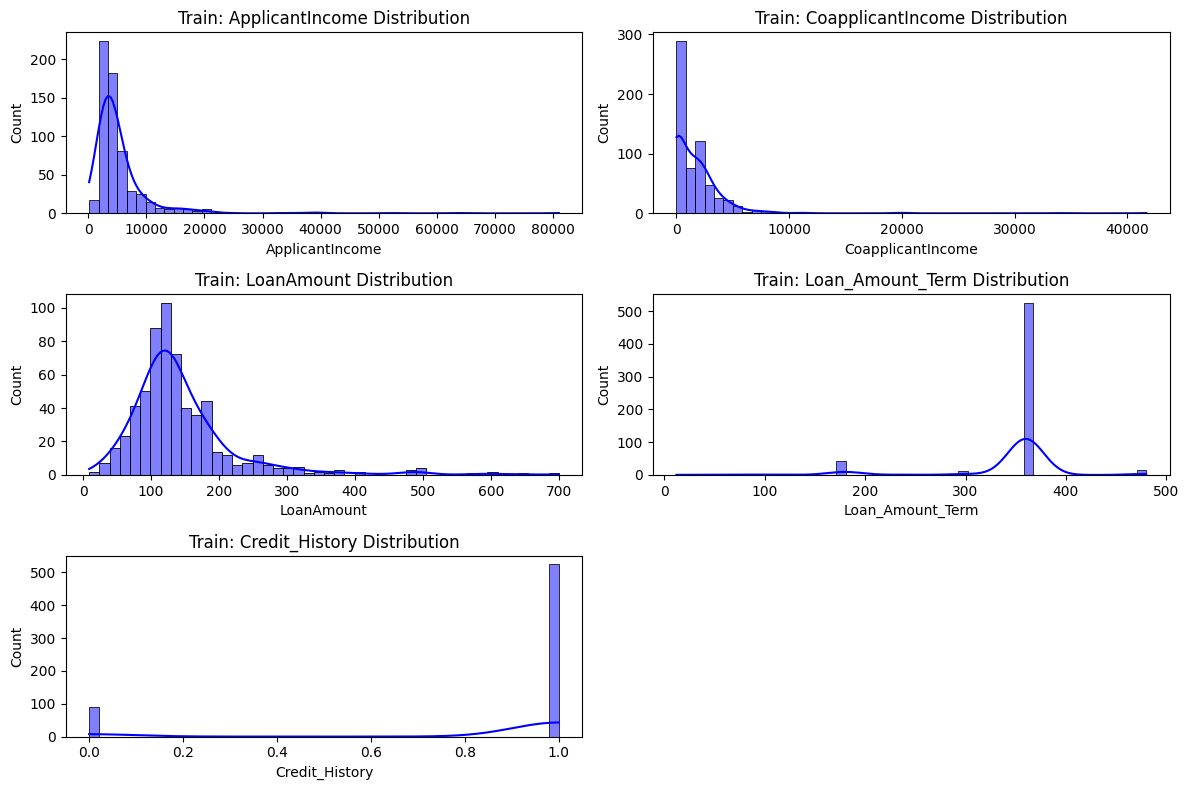


Train - Loan_ID Frequency Table:
Loan_ID
LP001002    1
LP001003    1
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    1
Name: count, Length: 614, dtype: int64

Train - Gender Frequency Table:
Gender
Male      502
Female    112
Name: count, dtype: int64

Train - Married Frequency Table:
Married
Yes    401
No     213
Name: count, dtype: int64

Train - Dependents Frequency Table:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Train - Education Frequency Table:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Train - Self_Employed Frequency Table:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Train - Property_Area Frequency Table:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Train - Loan_Status Frequency Table:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


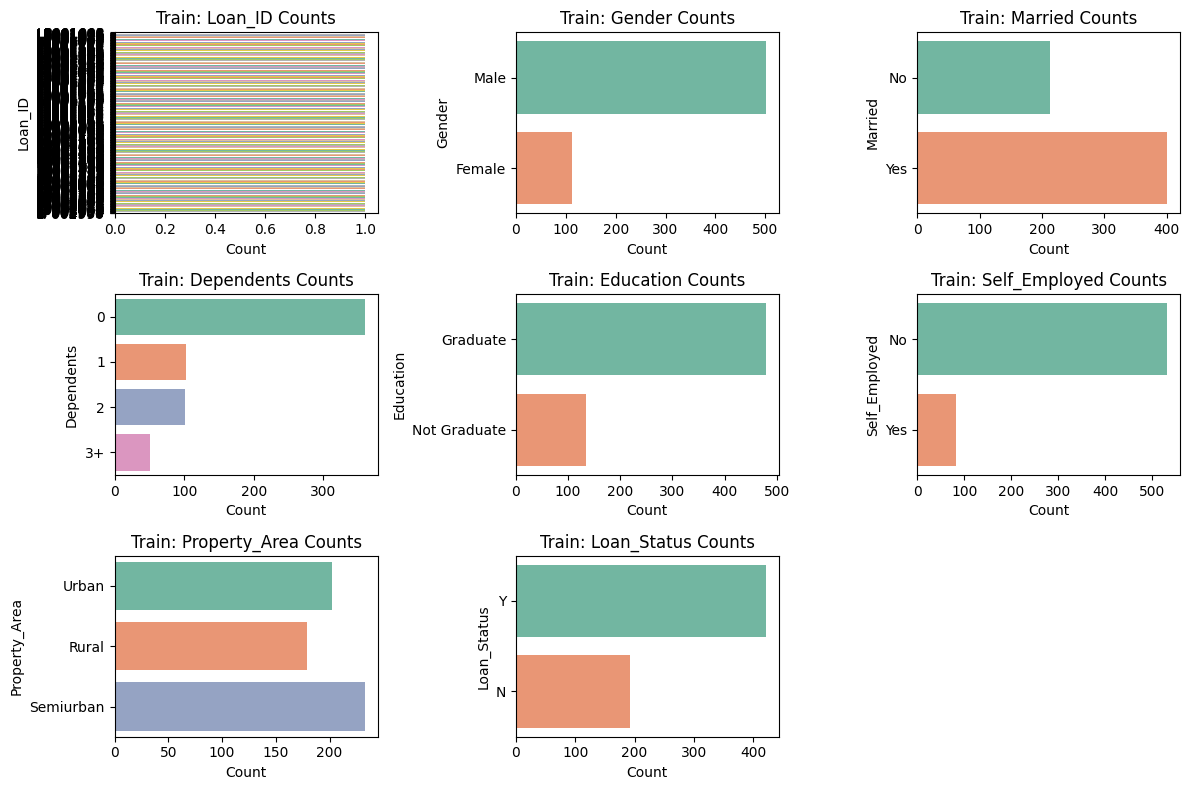


=== Univariate Analysis: Test Dataset ===

Test - ApplicantIncome Statistics:
Mean: 4805.60
Median: 3786.00
Std Dev: 4910.69

Test - CoapplicantIncome Statistics:
Mean: 1569.58
Median: 1025.00
Std Dev: 2334.23

Test - LoanAmount Statistics:
Mean: 135.98
Median: 125.00
Std Dev: 60.96

Test - Loan_Amount_Term Statistics:
Mean: 342.82
Median: 360.00
Std Dev: 64.66

Test - Credit_History Statistics:
Mean: 0.84
Median: 1.00
Std Dev: 0.37


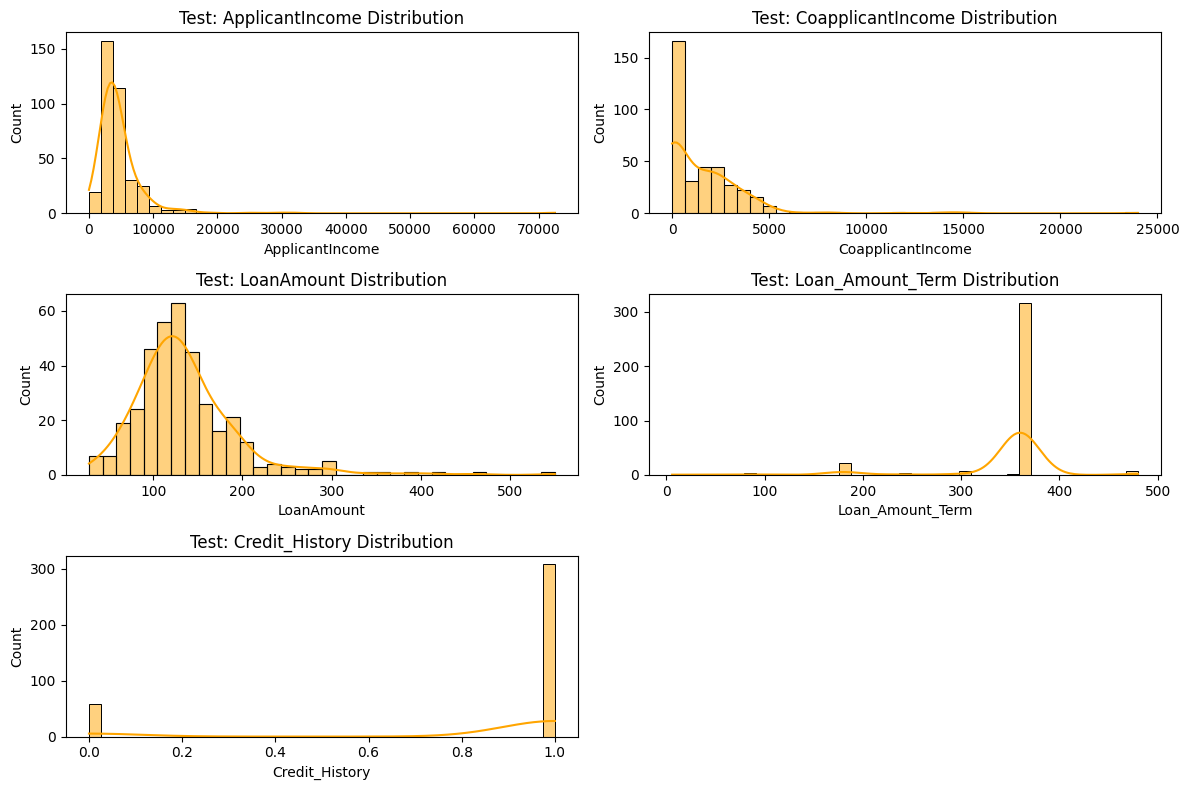


Test - Gender Frequency Table:
Gender
Male      297
Female     70
Name: count, dtype: int64

Test - Married Frequency Table:
Married
Yes    233
No     134
Name: count, dtype: int64

Test - Dependents Frequency Table:
Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

Test - Education Frequency Table:
Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

Test - Self_Employed Frequency Table:
Self_Employed
No     330
Yes     37
Name: count, dtype: int64

Test - Property_Area Frequency Table:
Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64


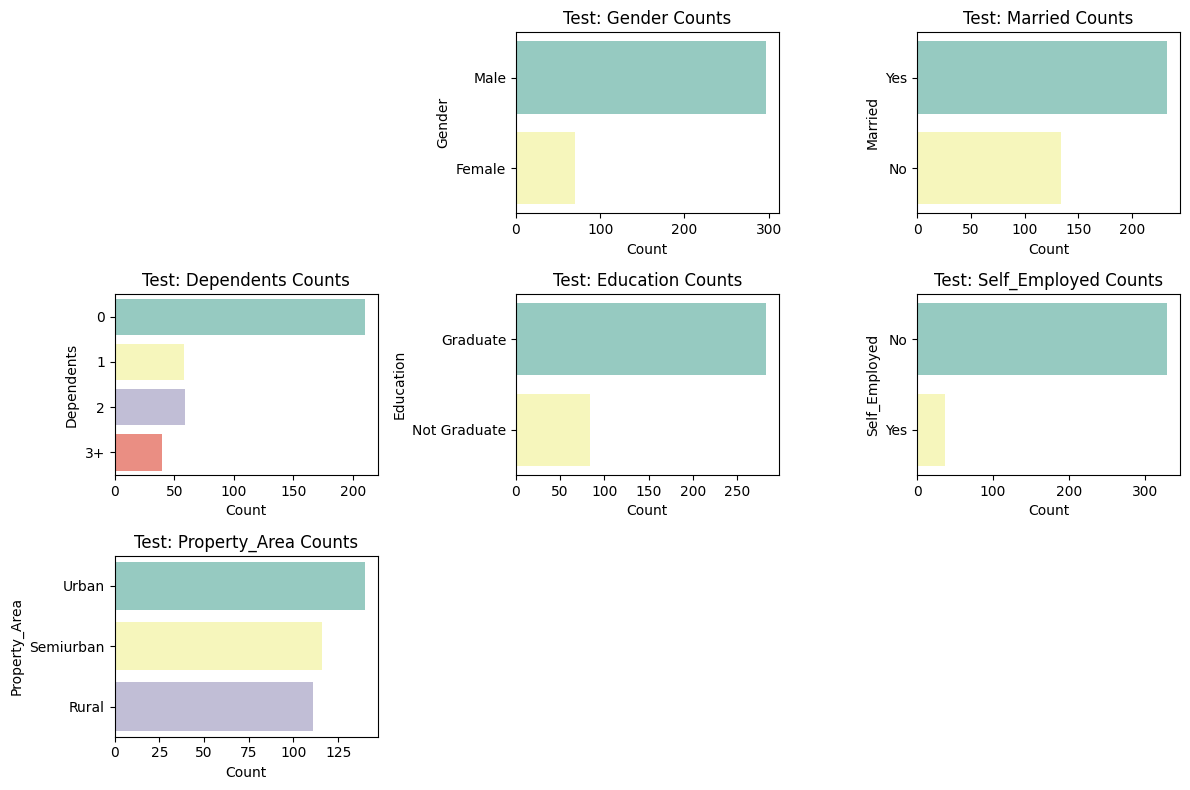

In [53]:
# Univariate Analysis - Train Dataset
print("\n=== Univariate Analysis: Train Dataset ===")
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df1[col], kde=True, color='blue')
    plt.title(f'Train: {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    print(f"\nTrain - {col} Statistics:")
    print(f"Mean: {df1[col].mean():.2f}")
    print(f"Median: {df1[col].median():.2f}")
    print(f"Std Dev: {df1[col].std():.2f}")
plt.tight_layout()
plt.show()

# Categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=df1, hue=col, palette='Set2', legend=False)
    plt.title(f'Train: {col} Counts')
    plt.xlabel('Count')
    plt.ylabel(col)
    print(f"\nTrain - {col} Frequency Table:")
    print(df1[col].value_counts())
plt.tight_layout()
plt.show()

# Univariate Analysis - Test Dataset
print("\n=== Univariate Analysis: Test Dataset ===")
numerical_cols_test = df2.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_test = df2.select_dtypes(include=['object']).columns

# Numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_test, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df2[col], kde=True, color='orange')
    plt.title(f'Test: {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    print(f"\nTest - {col} Statistics:")
    print(f"Mean: {df2[col].mean():.2f}")
    print(f"Median: {df2[col].median():.2f}")
    print(f"Std Dev: {df2[col].std():.2f}")
plt.tight_layout()
plt.show()

# Categorical variables (excluding Loan_Status, as test dataset likely lacks it)
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols_test, 1):
    if col != 'Loan_ID':  # Skip Loan_ID as it's a unique identifier
        plt.subplot(3, 3, i)
        sns.countplot(y=col, data=df2, hue=col, palette='Set3', legend=False)
        plt.title(f'Test: {col} Counts')
        plt.xlabel('Count')
        plt.ylabel(col)
        print(f"\nTest - {col} Frequency Table:")
        print(df2[col].value_counts())
plt.tight_layout()
plt.show()

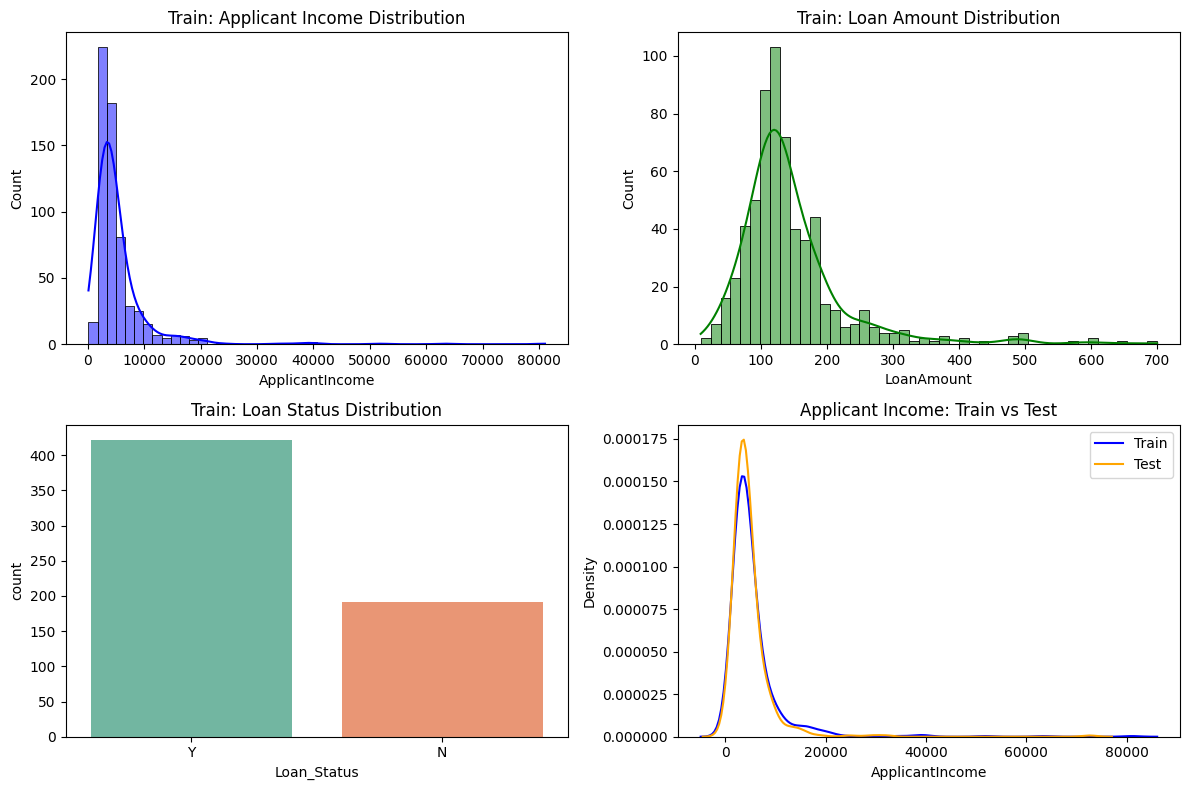


Correlation Matrix (Train Dataset):


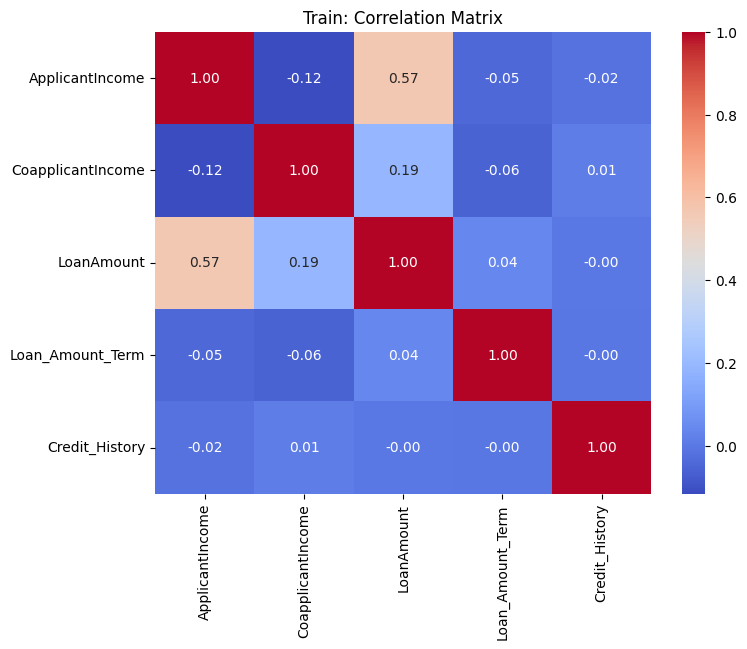

In [54]:
# Visualizations for train dataset
plt.figure(figsize=(12, 8))

# Distribution of ApplicantIncome (Train)
plt.subplot(2, 2, 1)
sns.histplot(df1['ApplicantIncome'], kde=True, color='blue')
plt.title('Train: Applicant Income Distribution')

# Distribution of LoanAmount (Train)
plt.subplot(2, 2, 2)
sns.histplot(df1['LoanAmount'], kde=True, color='green')
plt.title('Train: Loan Amount Distribution')

# Loan Status distribution (Train only)
if 'Loan_Status' in df1.columns:
    plt.subplot(2, 2, 3)
    sns.countplot(x='Loan_Status', data=df1, hue='Loan_Status', palette='Set2', legend=False)
    plt.title('Train: Loan Status Distribution')

# Compare ApplicantIncome between Train and Test
plt.subplot(2, 2, 4)
sns.kdeplot(df1['ApplicantIncome'], label='Train', color='blue')
sns.kdeplot(df2['ApplicantIncome'], label='Test', color='orange')
plt.title('Applicant Income: Train vs Test')
plt.legend()

plt.tight_layout()
plt.show()


# Correlation Matrix (Train)
print("\nCorrelation Matrix (Train Dataset):")
corr_matrix = df1[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Train: Correlation Matrix')
plt.show()